<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-03 17:22:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.4’

survey-results-publ 100%[===================>] 201.62M  67.6MB/s    in 3.0s    

2025-08-03 17:22:39 (67.6 MB/s) - ‘survey-results-public.sqlite.4’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 168.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 173.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 170.2 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns

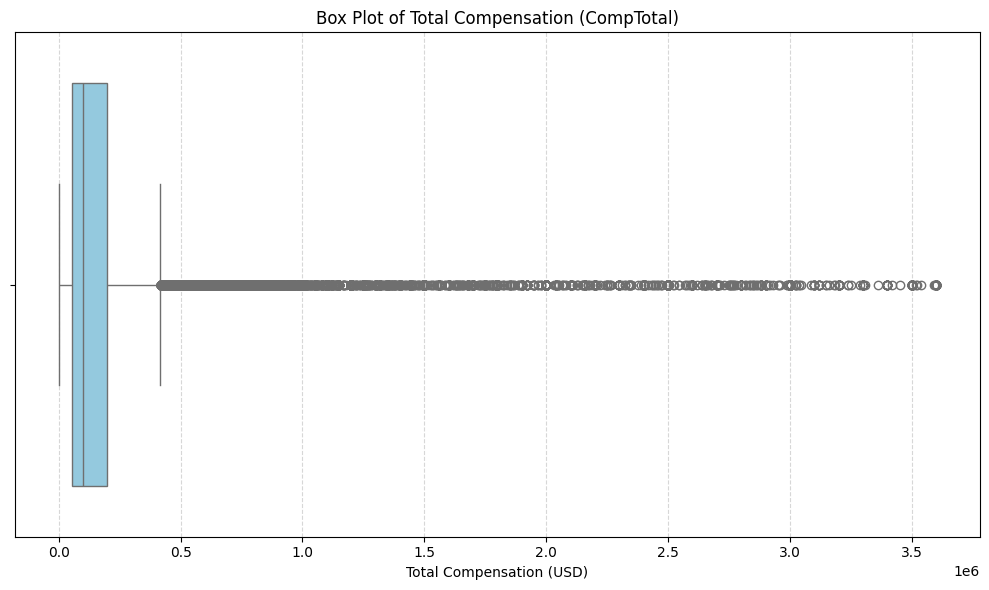

In [7]:
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()
df = df[df['CompTotal'] <= df['CompTotal'].quantile(0.95)] 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompTotal'], color='skyblue')
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


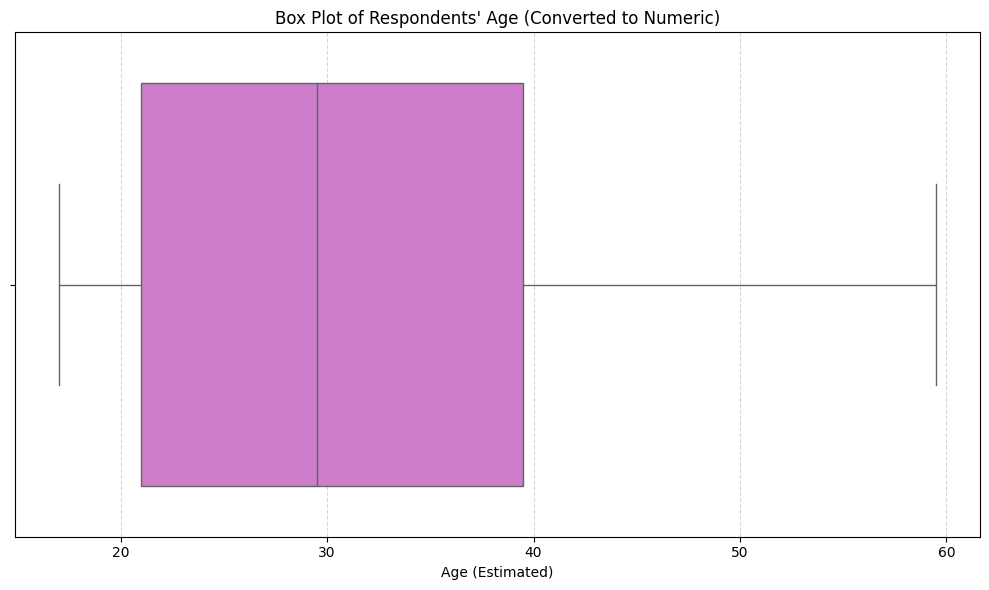

In [8]:
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(query, conn)

def map_age_to_numeric(age_str):
    try:
        age_str = age_str.lower().replace(' years old', '').strip()
        if '-' in age_str:
            low, high = age_str.split('-')
            return (int(low.strip()) + int(high.strip())) / 2 
        elif 'under' in age_str:
            return 17
        elif '65 or older' in age_str:
            return 70
        else:
            return None
    except:
        return None

df['AgeNumeric'] = df['Age'].apply(map_age_to_numeric)
df = df.dropna(subset=['AgeNumeric'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeNumeric'], color='orchid')
plt.title('Box Plot of Respondents\' Age (Converted to Numeric)')
plt.xlabel('Age (Estimated)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_300/3965809755.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='CompTotal', order=['Under 18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+'], palette='coolwarm')


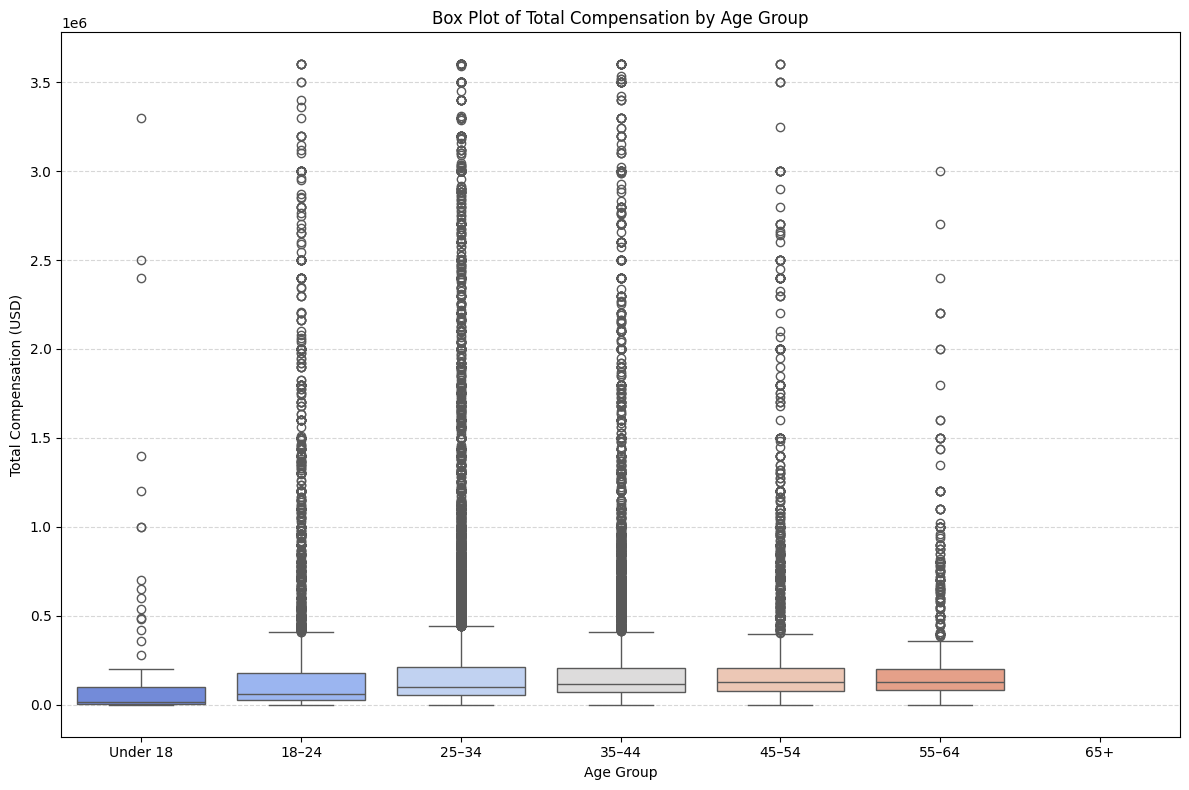

In [9]:
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

def clean_age_group(age_str):
    age_str = age_str.lower()
    if '18-24' in age_str:
        return '18–24'
    elif '25-34' in age_str:
        return '25–34'
    elif '35-44' in age_str:
        return '35–44'
    elif '45-54' in age_str:
        return '45–54'
    elif '55-64' in age_str:
        return '55–64'
    elif '65 or older' in age_str:
        return '65+'
    elif 'under' in age_str:
        return 'Under 18'
    else:
        return 'Other'

df['AgeGroup'] = df['Age'].apply(clean_age_group)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

df = df[df['CompTotal'] <= df['CompTotal'].quantile(0.95)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='AgeGroup', y='CompTotal', order=['Under 18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+'], palette='coolwarm')

plt.title('Box Plot of Total Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_300/2400939389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[0:200], x='JobSatPoints_6', y='CompTotal', palette='Spectral')


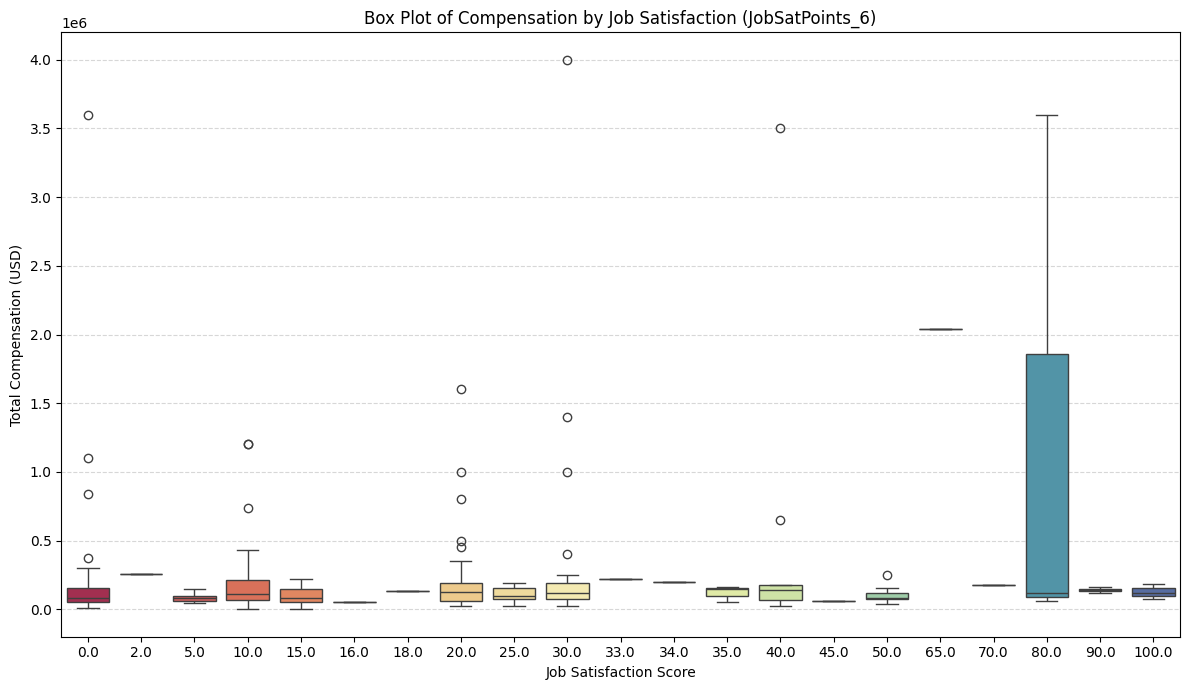

In [15]:
query = "SELECT JobSatPoints_6, CompTotal FROM main WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna()
df = df[df['CompTotal'] <= df['CompTotal'].quantile(0.95)]

plt.figure(figsize=(12, 7))
sns.boxplot(data=df[0:200], x='JobSatPoints_6', y='CompTotal', palette='Spectral')

plt.title('Box Plot of Compensation by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_300/2032205058.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='DevType', y='ConvertedCompYearly', palette='coolwarm')


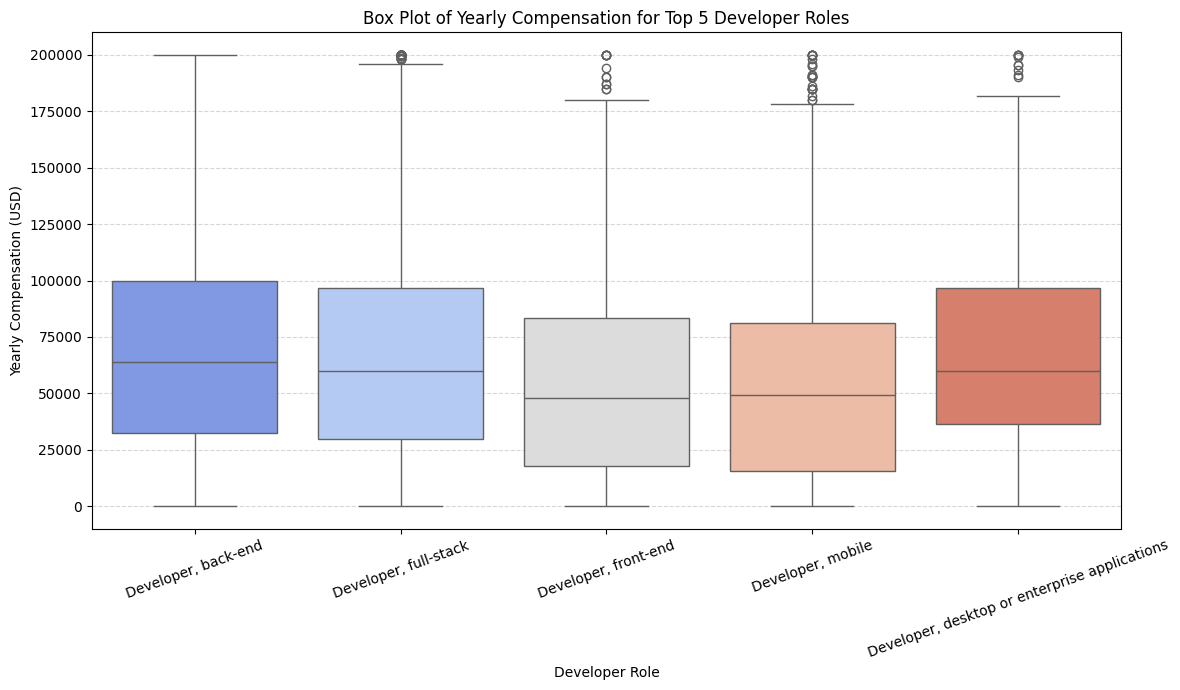

In [16]:
query = """
SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])

df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df['DevType'] = df['DevType'].str.strip()

top_5_types = df['DevType'].value_counts().head(5).index.tolist()
df_top = df[df['DevType'].isin(top_5_types)]

df_top = df_top[df_top['ConvertedCompYearly'] <= df_top['ConvertedCompYearly'].quantile(0.95)]

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top, x='DevType', y='ConvertedCompYearly', palette='coolwarm')
plt.title('Box Plot of Yearly Compensation for Top 5 Developer Roles')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_300/503184868.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='Country', y='CompTotal', palette='Set2')


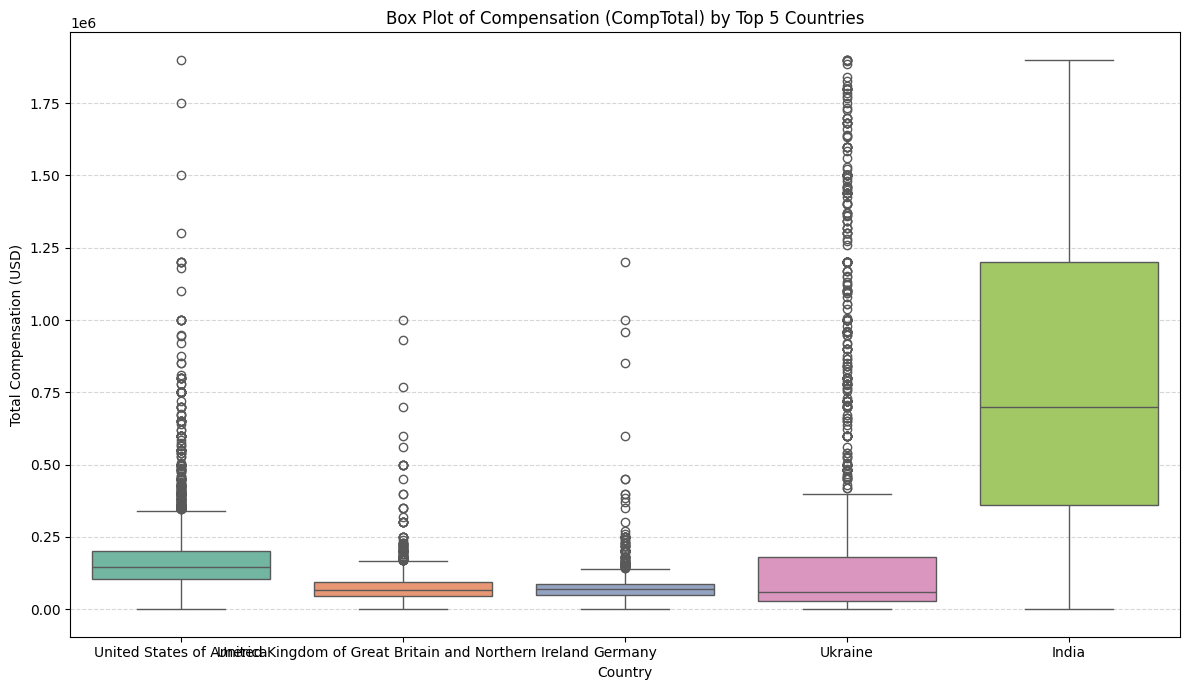

In [18]:
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

top_countries = df['Country'].value_counts().head(5).index.tolist()
df_top = df[df['Country'].isin(top_countries)]
df_top = df_top[df_top['CompTotal'] <= df_top['CompTotal'].quantile(0.95)]
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top, x='Country', y='CompTotal', palette='Set2')
plt.title('Box Plot of Compensation (CompTotal) by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_300/332334333.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EmploymentGroup', y='CompTotal', palette='Set2')


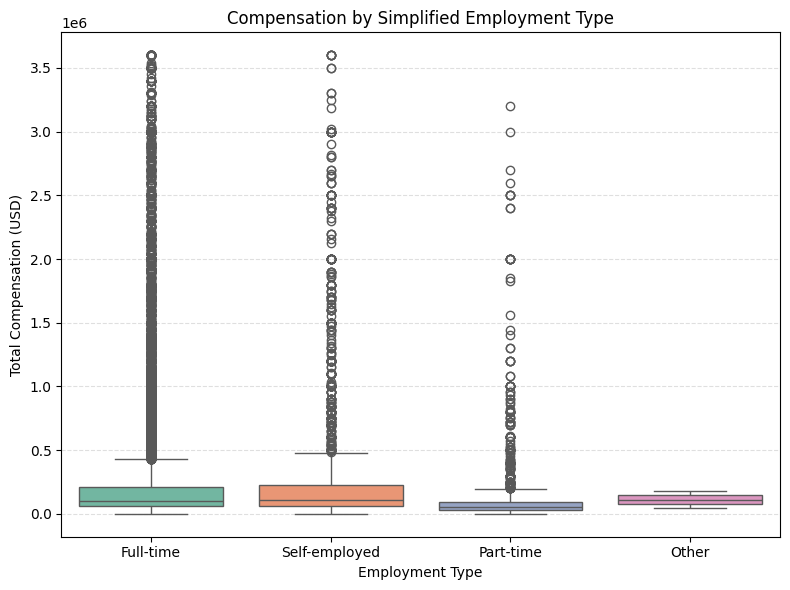

In [26]:
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

def simplify_employment(emp):
    if 'full-time' in emp.lower():
        return 'Full-time'
    elif 'part-time' in emp.lower():
        return 'Part-time'
    elif 'self-employed' in emp.lower() or 'freelancer' in emp.lower():
        return 'Self-employed'
    elif 'student' in emp.lower():
        return 'Other'
    elif 'retired' in emp.lower():
        return 'Other'
    elif 'not employed' in emp.lower():
        return 'Other'
    else:
        return 'Other'

df['EmploymentGroup'] = df['Employment'].apply(simplify_employment)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

df = df[df['CompTotal'] <= df['CompTotal'].quantile(0.95)]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='EmploymentGroup', y='CompTotal', palette='Set2')
plt.title('Compensation by Simplified Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_300/487905735.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SatisfactionRounded', y='YearsCodePro', palette='viridis')


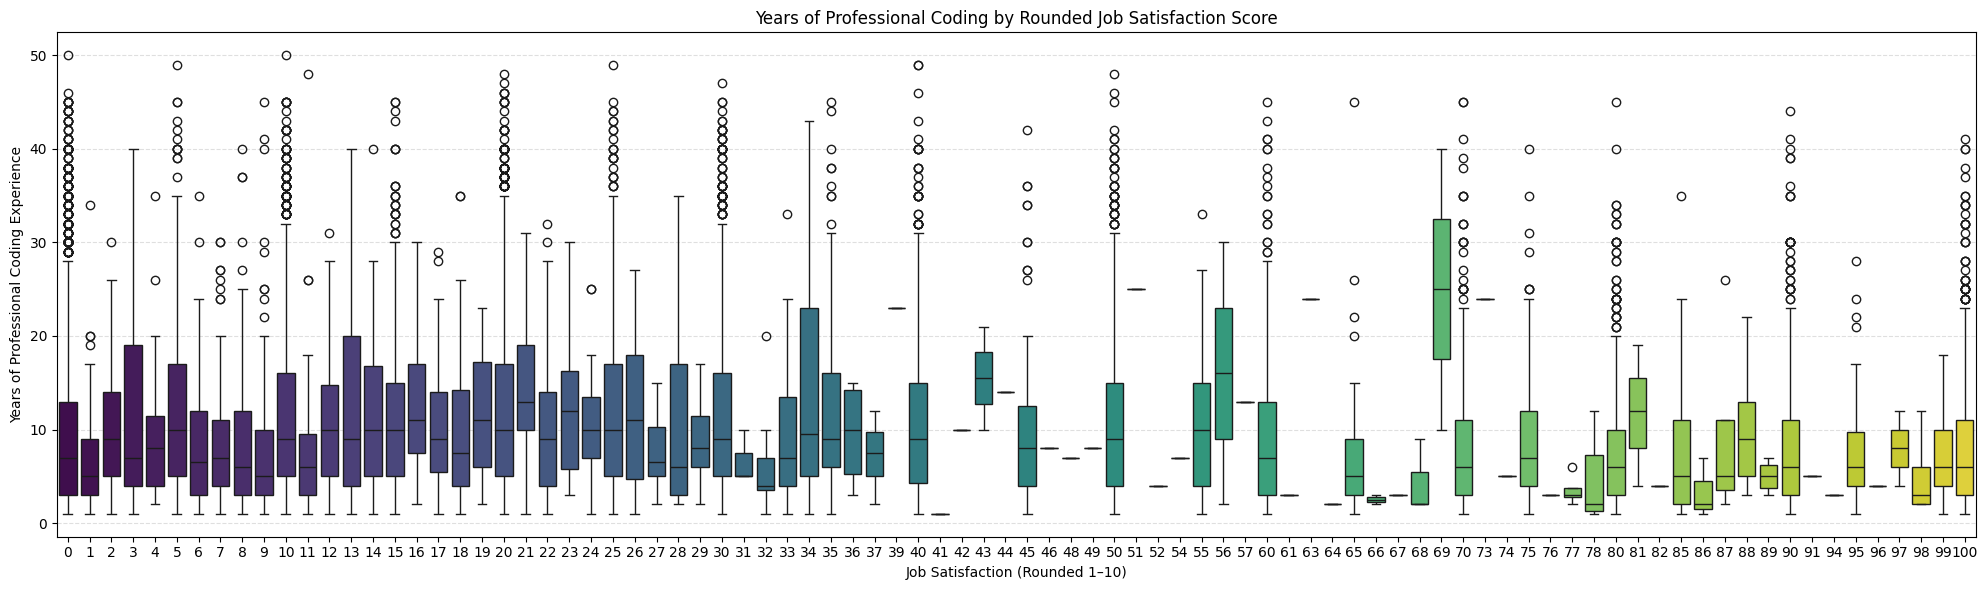

In [33]:
query = """
SELECT JobSatPoints_6, YearsCodePro 
FROM main 
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean and convert types
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna()

# Optional: remove extreme outliers (50+ years)
df = df[df['YearsCodePro'] <= 50]

# ✨ NEW: Round satisfaction to nearest whole number
df['SatisfactionRounded'] = df['JobSatPoints_6'].round().astype(int)

# Plot box plot with clean satisfaction labels
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='SatisfactionRounded', y='YearsCodePro', palette='viridis')
plt.title('Years of Professional Coding by Rounded Job Satisfaction Score')
plt.xlabel('Job Satisfaction (Rounded 1–10)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
